In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import scipy.stats as stats 
import matplotlib.pyplot as plt 
from scipy import stats 
import scipy.stats 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("cleaned.csv")

hypothesis testing 

ckecking correlation

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [7]:
# Filter numeric columns only
numeric_df = df.select_dtypes(include=["number"])

# Compute correlation
correlation_matrix = numeric_df.corr()

# Display the result
print(correlation_matrix)


               math score  reading score  writing score  total score   average
math score       1.000000       0.817580       0.802642     0.918746  0.918746
reading score    0.817580       1.000000       0.954598     0.970331  0.970331
writing score    0.802642       0.954598       1.000000     0.965667  0.965667
total score      0.918746       0.970331       0.965667     1.000000  1.000000
average          0.918746       0.970331       0.965667     1.000000  1.000000


In [8]:
num_data=["math score","reading score","writing score"] 

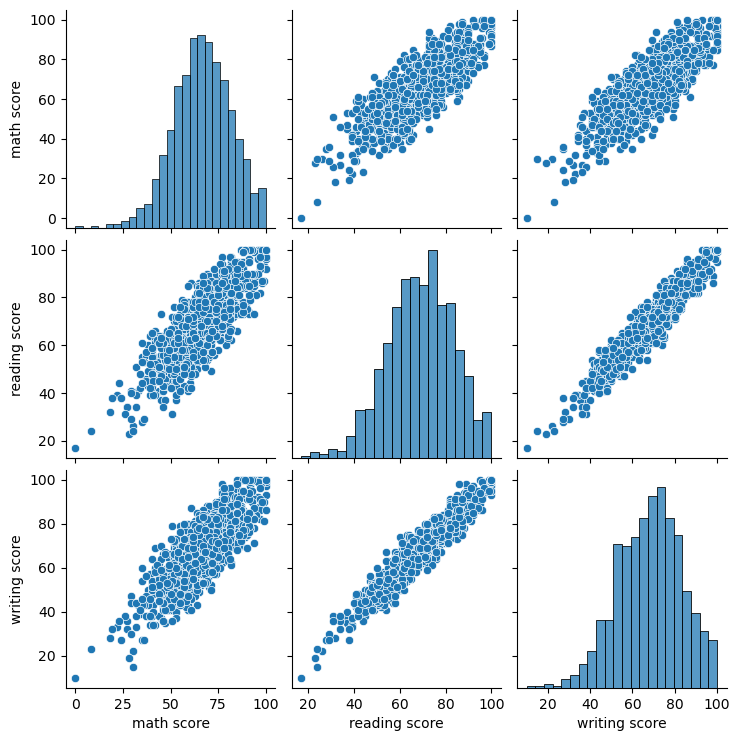

In [9]:
sns.pairplot(df.iloc[:,4:8])

In [13]:
num_features=[col for col in df.columns if df[col].dtypes!='O']
num_df=df[num_features]

shapiro wick test 

In [25]:
from scipy.stats import shapiro
shapiro_wick_test=[]

for column in num_features:
    data_to_test=num_df[column]
    stat,p=shapiro(data_to_test)

    if p>0.05:
        shapiro_wick_test.append("Normally Distributed")
    else:
        shapiro_wick_test.append("Not normally distributed")

# Assuming numeric_df.columns contains the column names and shapiro_wick_test contains results
result = pd.DataFrame({
    'column name': numeric_df.columns,  # Extract column names from numeric_df
    'shapiro hypothesis result': shapiro_wick_test  # Hypothesis test results
})

# Display the result
print(result)


     column name shapiro hypothesis result
0     math score  Not normally distributed
1  reading score  Not normally distributed
2  writing score  Not normally distributed
3    total score  Not normally distributed
4        average  Not normally distributed


In [26]:
from scipy.stats import normaltest
normaltest_test=[]

for column in num_features:
    data_to_test=num_df[column]
    stat,p=normaltest(data_to_test)

    if p>0.05:
        normaltest_test.append("Normally Distributed")
    else:
        normaltest_test.append("Not normally distributed")

# Assuming numeric_df.columns contains the column names and shapiro_wick_test contains results
result = pd.DataFrame({
    'column name': numeric_df.columns,  # Extract column names from numeric_df
    'normal test hypothesis result': normaltest_test  # Hypothesis test results
})

# Display the result
print(result)


     column name normal test hypothesis result
0     math score      Not normally distributed
1  reading score      Not normally distributed
2  writing score      Not normally distributed
3    total score      Not normally distributed
4        average      Not normally distributed


Spearman rank correlation

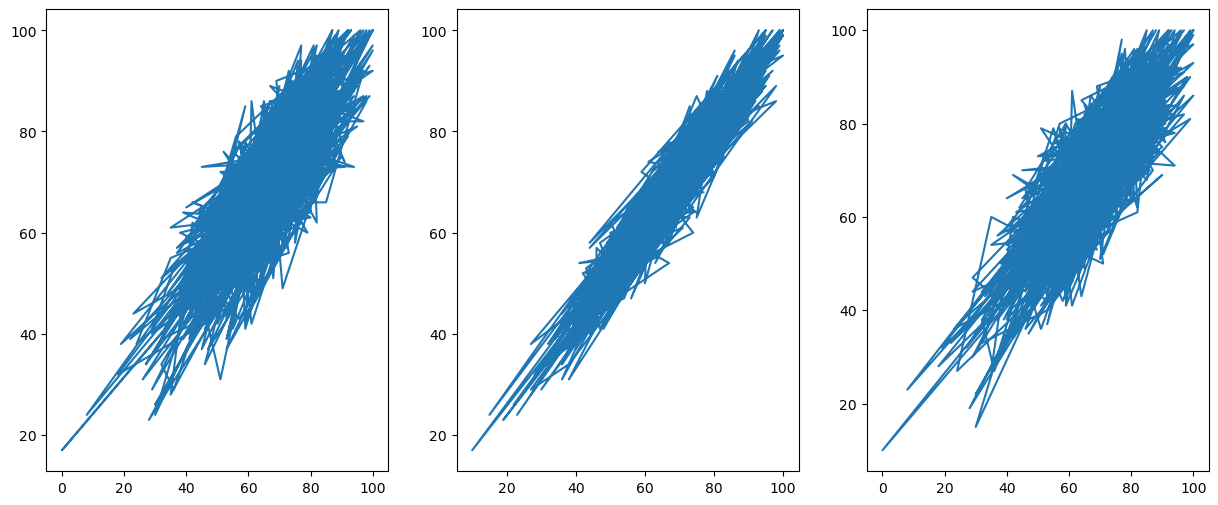

In [31]:
plt.rcParams["figure.figsize"]=(15,6)
plt.subplot(1,3,1)
plt.plot(num_df["math score"],num_df["reading score"])

plt.subplot(1,3,2)
plt.plot(num_df["writing score"],num_df["reading score"])

plt.subplot(1,3,3)
plt.plot(num_df["math score"],num_df["writing score"])

plt.show ()